In [ ]:
#!pip install -r requirements.txt

In [18]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = [24,16]

## Imports

In [14]:
DATA_ROOT = os.path.abspath('../../../../datasets/thick_smears_150')
GT_ROOT  = os.path.join(DATA_ROOT,'GT_updated')
all_files = glob.glob(os.path.join(GT_ROOT,'*','*.txt'))
all_images = glob.glob(os.path.join(DATA_ROOT,'*','*.jpg'))

## Load mask info

In [3]:
def read_info(path):
    # Read df (minus header)
    columns = ['id', 'classification', 'comments', 'circle_or_point', 'circ_point_num', 'y_centre', 'x_centre', 'y_point_circle', 'x_point_circle']
    temp = pd.read_csv(path, names = columns, skiprows=1)
    # Parse header
    with open(all_files[0]) as file:
        _,h,w = file.readline().strip().split(',')
    # Assemble    
    temp['height'], temp['width'] = int(h),int(w)
    return temp

df = pd.concat(map(read_info,all_files))  # Do a map to avoid creating the list of df explicitely

In [4]:
def calc_radius(x_diff,y_diff):
    return np.sqrt(np.power(x_diff,2) + np.power(y_diff,2))

# Calculate radius
df['radius'] = calc_radius(df['x_centre'] - df['x_point_circle'],df['y_centre'] - df['y_point_circle'])      

# Cast all numerical columns to int
df[df.select_dtypes('number').columns] = df.select_dtypes('number').fillna(0).astype('int')
df.head()

,id,classification,comments,circle_or_point,circ_point_num,y_centre,x_centre,y_point_circle,x_point_circle,height,width,radius
0,0-1,Parasite,No_Comment,Circle,2,2146,1191,2146,1210,4032,3024,18
1,0-10,Parasite,schizont,Circle,2,1955,2456,1958,2488,4032,3024,32
2,0-2,Parasite,No_Comment,Circle,2,2042,1401,2042,1420,4032,3024,18
3,0-3,Parasite,No_Comment,Circle,2,2094,1306,2092,1325,4032,3024,18
4,0-4,Parasite,No_Comment,Circle,2,1556,1438,1559,1452,4032,3024,14


### Create mask from center and radius

In [5]:
df.head(1)

,id,classification,comments,circle_or_point,circ_point_num,y_centre,x_centre,y_point_circle,x_point_circle,height,width,radius
0,0-1,Parasite,No_Comment,Circle,2,2146,1191,2146,1210,4032,3024,18


In [6]:
all_images[0], all_files[0]

('C:\\Users\\ABellaiche\\Downloads\\_Datasets\\malaria\\TF100_CS39\\20170829_205107.jpg',
 'C:\\Users\\ABellaiche\\Downloads\\_Datasets\\malaria\\GT_updated\\TF100_CS39\\20170829_205107.txt')

(4032, 3024, 3)


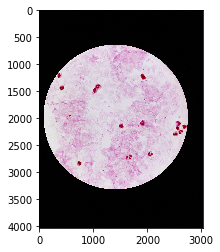

In [7]:
img = cv2.imread(all_images[0]) 
print(img.shape)
plt.imshow(img);

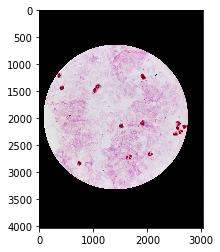

In [8]:
background_image = img #np.zeros((4032,3024), np.uint8)

# Add the outline
outline_image = cv2.circle(background_image,
                          center = (2146,1191),
                           radius = 19,
                           color = 0, # black
                           thickness = 2
                          ) 

# Add the filling
'''
filled_image = cv2.circle(outline_image,
                          center = (1191,2146),
                           radius = 19,
                           color = [255,255,128], # Light red
                           thickness = cv2.FILLED  # Will draw a filled circle
                          )
'''

plt.imshow(outline_image);
#plt.ylim(1000,1300);
#plt.xlim(2000,2300);